In [1]:
import os
import librosa
import librosa.display
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scales = "audiofiles/C scales.mp3"

In [3]:
display.Audio(scales)

Load into librosa

In [4]:
scales, sr = librosa.load(scales)

C:\Users\Brandon\miniconda3\envs\tensorflowenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [7]:
scales.shape

(700482,)

Mel Filter banks

In [5]:
filter_banks = librosa.filters.mel(n_fft=2048,sr=sr,n_mels=10)

In [6]:
filter_banks.shape

(10, 1025)

This has 10 rows because there are 10 mel bins

The 1025 refers to the (frame_size/2 + 1)

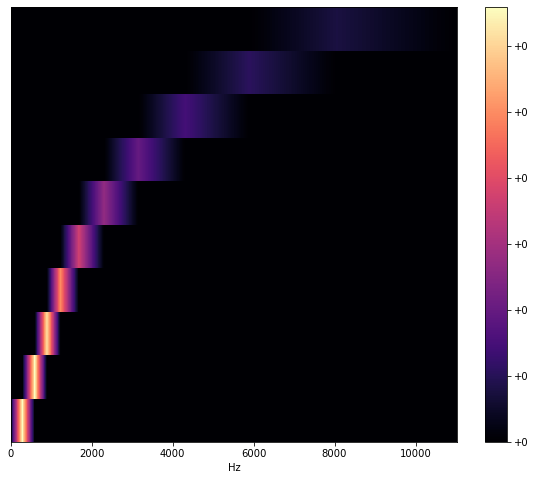

In [8]:
plt.figure(figsize=(10,8))
librosa.display.specshow(filter_banks,sr=sr,x_axis='linear')
plt.colorbar(format="%+2.f")
plt.show()

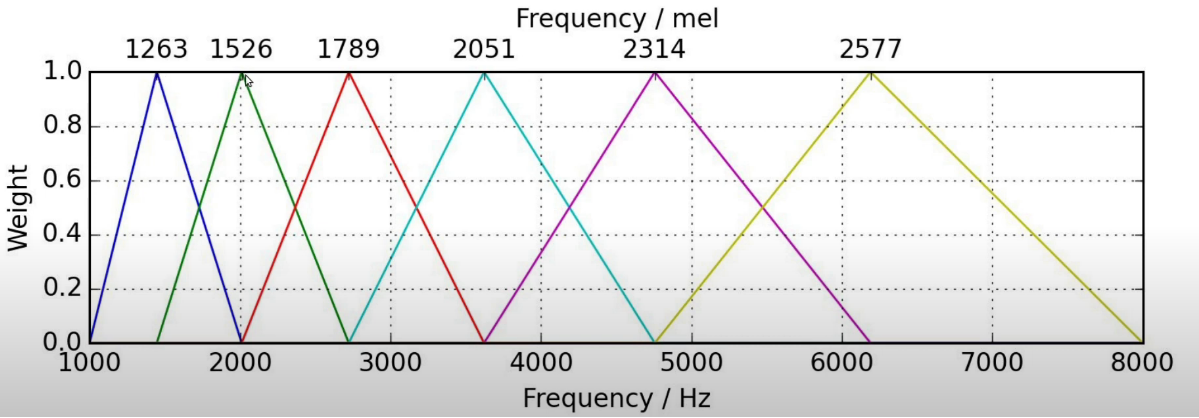

In [9]:
display.Image("5 - Mel Triangle Filters.png")

The spectrogram shown is essentially this triangular filter from the lesson

Notice how each band in the spectrogram has a large weight in the middle (weight = 1) and tapers off toward the edges (weight = 0) ... that is a triangular filter!

There are 10 bands because we specified `n_mel = 10`

Extracting Mel Spectrogram

In [25]:
mel_spectrogram = librosa.feature.melspectrogram(scales,sr=sr,n_fft=1024,hop_length=512,n_mels=60)
#This feature does....
# 1) Compute spectrogram
# 2) Compute mel filter banks
# 3) Apply mel filter banks to the spectrogram

In [26]:
mel_spectrogram.shape

(60, 1369)

In [27]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram) #Gotta still convert to log though!

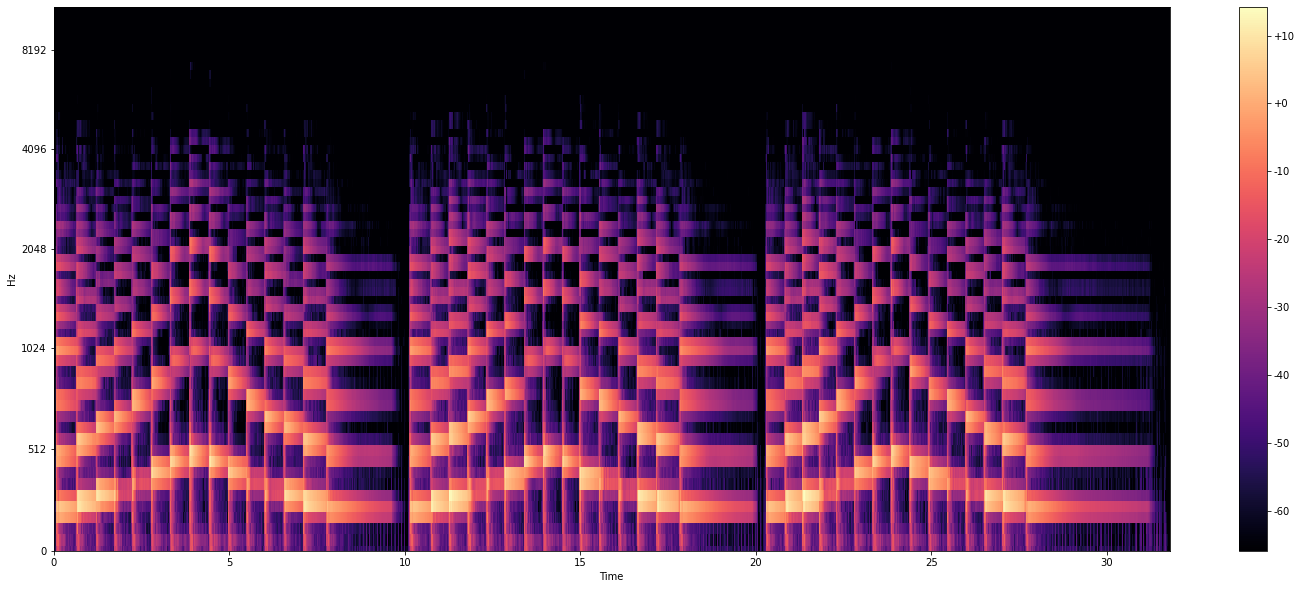

In [28]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,
                        x_axis='time',
                        y_axis='mel',
                        sr=sr)
plt.colorbar(format='%+2.f')
plt.show()

The mel spectrogram has
> x-axis = Time (s)
> <br>y-axis = Frequency (__mel__ Hz) <br>
> Color-axis = decibles = Intensity of said note

The music being played here is C-major, C-minor (harmonic), C-minor (melodic)